In [467]:
# Script - 2

In [3]:
import pandas as pd

In [5]:
df = df_truckdekho

In [401]:
df = pd.read_csv(r"C:\Users\risha\Downloads\India_GIS\Scripts\cleaned_truck_data_before_onehot.csv")

In [402]:
import re

# Update the function to handle non-string or missing values
def convert_charging_time(time_string):
    if not isinstance(time_string, str):
        return None  # Return None for non-string values
    
    time_string = time_string.lower()
    
    # Extract numbers for hours and minutes
    hrs = re.search(r'(\d+\.?\d*)\s*hour', time_string)
    mins = re.search(r'(\d+\.?\d*)\s*min', time_string)

    total_hours = 0

    # Calculate hours
    if hrs:
        total_hours += float(hrs.group(1))

    # Calculate minutes in hours
    if mins:
        total_hours += float(mins.group(1)) / 60

    # Handle range (like 4-5 hours)
    range_match = re.search(r'(\d+\.?\d*)\s*-\s*(\d+\.?\d*)', time_string)
    if range_match:
        avg_time = (float(range_match.group(1)) + float(range_match.group(2))) / 2
        return avg_time

    return total_hours if total_hours > 0 else None

# Apply conversion to Charging - Charging Time column
df['Charging - Charging Time'] = df['Charging - Charging Time'].apply(convert_charging_time)

# Remove units (mm) from Dimension - Wheelbase (mm) and convert to numeric
df['Dimension - Wheelbase (mm)'] = df['Dimension - Wheelbase (mm)'].replace(to_replace=r'\s*mm', value='', regex=True).astype(float)

# Remove units (V) from Others - Battery(Volts) and convert to numeric
df['Others - Battery(Volts)'] = df['Others - Battery(Volts)'].replace(to_replace=r'\s*V', value='', regex=True).astype(float)

# Preview the updated columns
df[['Charging - Charging Time', 'Dimension - Wheelbase (mm)', 'Others - Battery(Volts)']].head()


,Charging - Charging Time,Dimension - Wheelbase (mm),Others - Battery(Volts)
0,0.833333,2073.0,48.0
1,0.750000,1920.0,48.0
2,4.000000,2010.0,48.0
3,4.333333,2073.0,48.0
4,0.500000,2274.0,NaN


In [404]:
# Filter the rows where the price is not equal to 3
df_fil = df[df['Price (Lakh INR)'] != 3]

# Now, we count the non-NA values in each column and remove columns that have less than 8 non-NA values
df_final = df_fil.dropna(thresh=8, axis=1)

# Display the structure and a sample of the final cleaned DataFrame
df_final_structure = df_final.info()
df_final_sample = df_final.head()


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 13
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Serial ID                                            12 non-null     int64  
 1   Name                                                 12 non-null     object 
 2   Performance - Max Power                              12 non-null     float64
 3   Performance - Max Torque                             10 non-null     float64
 4   Performance - Top Speed                              8 non-null      float64
 5   Performance - Gradeability (%)                       11 non-null     float64
 6   Performance - Turning Radius (mm)                    8 non-null      float64
 7   Performance - Range                                  12 non-null     float64
 8   Performance - Battery Capacity                       10 non-null     float64


In [405]:
# Identifying categorical and numerical columns
categorical_columns = df_fil.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')
numerical_columns = df_fil.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.mean()))

In [406]:
#df.shape

(32, 33)

In [62]:
#df.to_csv(r"C:\Users\risha\Downloads\EV_Analysis\Scripts\Assignment-Part2\Data\Processed Data\df_truckdekho_proc_final.csv")

In [407]:
df_truckdekho_proc_final = df

In [413]:
import pandas as pd

# Load the new datasets for inspection
path_TractorJunction = r"C:\Users\risha\Downloads\EV_Analysis\Scripts\Assignment-Part2\Data\Raw Data\df_TractorJunction.csv"

# Reading the datasets
df_TractorJunction = pd.read_csv(path_TractorJunction)

# Inspecting the structure of both datasets
TractorJunction_info = df_TractorJunction.info()

# Displaying the first few rows of each dataframe
TractorJunction_head = df_TractorJunction.head()

TractorJunction_info, TractorJunction_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rickshaw Name             15 non-null     object 
 1   Average Price (Lakh INR)  15 non-null     object 
 2   Motor Type                13 non-null     object 
 3   Engine Norm               2 non-null      object 
 4   Max Speed                 9 non-null      object 
 5   No. of Tyres              14 non-null     float64
 6   GVW                       6 non-null      object 
 7   Range                     8 non-null      object 
 8   Length                    13 non-null     object 
 9   Width                     13 non-null     object 
 10  Height                    13 non-null     object 
 11  Brakes                    12 non-null     object 
 12  Parking Brakes            10 non-null     object 
 13  Abs                       8 non-null      object 
 14  Gearbox     

(None,
                    Rickshaw Name Average Price (Lakh INR)  \
 0              saarthi-truck dlx                     0.95   
 1  yc-electric-truck yatri-super                     1.71   
 2             aahana-truck ave-1      Price Not Available   
 3             saarthi-truck star                     1.38   
 4              mayuri-truck star       1.2149999999999999   
 
                   Motor Type    Engine Norm Max Speed  No. of Tyres     GVW  \
 0  Electric motor 1000 Watts  Zero Tailpipe   25 KMPH           3.0  650 KG   
 1                 BLDC Motor            NaN   25 KMPH           3.0  693 KG   
 2         48V, 1000W / 1200W            NaN       NaN           3.0     NaN   
 3        3000 Watts AC Motor            NaN   50 KMPH           3.0  350 KG   
 4                        NaN            NaN       NaN           3.0     NaN   
 
              Range   Length    Width  ...           Front Suspension  \
 0    120 Km/charge  2730 MM   980 MM  ...                      

In [419]:
df = df_TractorJunction

In [420]:
import pandas as pd

# Assuming df is already loaded with your data
df = df

# 1. Keep 'Rickshaw Name' - no processing required

# 2. Motor Type: Extract the largest number before 'W' or 'Watt' and convert it to float
def process_motor_type(value):
    if isinstance(value, str):
        # Find all the numbers in the string
        import re
        watt_matches = re.findall(r'(\d+)\s*(W|Watt)', value)  # Find numbers with W or Watt
        if watt_matches:
            # Extract the largest watt value (in case there are multiple numbers like 1000W / 1200W)
            watt_values = [int(match[0]) for match in watt_matches]
            return max(watt_values)
    return float('nan')  # Return NaN if no match found or the value is not a string

df['Motor Type'] = df['Motor Type'].apply(process_motor_type)

# 3. Max Speed: Remove unit 'KMPH' and convert to float
def process_max_speed(value):
    if isinstance(value, str):
        return float(value.replace('KMPH', '').strip())  # Remove 'KMPH' and convert to float
    return value  # If it's not a string, leave it as is

df['Max Speed'] = df['Max Speed'].apply(process_max_speed)

# 4. GVW: Remove unit 'KG' and convert to float
def process_gvw(value):
    if isinstance(value, str):
        return float(value.replace('KG', '').strip())  # Remove 'KG' and convert to float
    return value  # If it's not a string, leave it as is

df['GVW'] = df['GVW'].apply(process_gvw)

# 5. Range: Handle ranges like '75-90' and remove the unit 'Km/charge'
def process_range_column(value):
    if isinstance(value, str):
        # Remove unit 'Km/charge'
        value = value.replace('Km/charge', '').strip()
        
        # Check if there is a range format like 'X-Y'
        if '-' in value:
            values = value.split('-')
            return (float(values[0].strip()) + float(values[1].strip())) / 2
        else:
            return float(value.strip())
    return value

df['Range'] = df['Range'].apply(process_range_column)

# 6. Length, Width, Height: Remove unit 'MM' and convert to float
def process_dimension(value):
    if isinstance(value, str):
        return float(value.replace('MM', '').strip())
    return value

df['Length'] = df['Length'].apply(process_dimension)
df['Width'] = df['Width'].apply(process_dimension)
df['Height'] = df['Height'].apply(process_dimension)

# 7. Charging Time: Extract numbers and convert to hours if necessary
def process_charging_time(value):
    if isinstance(value, str):
        # Example formats: '3 h 50 min', '4-5 Hour', '4.30 Hours'
        value = value.lower().replace('hrs', '').replace('hours', '').replace('hour', '').replace('min', '').strip()
        if '-' in value:  # Range case
            values = value.split('-')
            return (float(values[0].strip()) + float(values[1].strip())) / 2
        elif '.' in value:  # Decimal hour format
            return float(value)
        else:
            hours = [float(s) for s in value.split() if s.isdigit()]
            return sum(hours)
    return value

df['Charging Time'] = df['Charging Time'].apply(process_charging_time)

# 8. Wheelbase, Ground Clearance: Remove 'MM' and convert to float
df['Wheelbase'] = df['Wheelbase'].apply(process_dimension)
df['Ground Clearance'] = df['Ground Clearance'].apply(process_dimension)

# Drop columns that were requested to be dropped
columns_to_drop = ['No. of Tyres', 'Abs', 'Gearbox', 'Steering', 'Link', 'Front Suspension', 
                   'Rear Suspension', 'Front Axle', 'Rear Axle', 'Charger Type', 'Payload Capacity',
                   'Minimum Turning Radius', 'Battery Capacity', 'Max Torque', 'Tiltable Cabin']

# Use errors='ignore' to avoid KeyError if a column is not present
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Check the final result
print(df.head())

# Save processed DataFrame
df.to_csv('processed_rickshaw_data_updated.csv', index=False)


                   Rickshaw Name Average Price (Lakh INR)  Motor Type  \
0              saarthi-truck dlx                     0.95      1000.0   
1  yc-electric-truck yatri-super                     1.71         NaN   
2             aahana-truck ave-1      Price Not Available      1200.0   
3             saarthi-truck star                     1.38      3000.0   
4              mayuri-truck star       1.2149999999999999         NaN   

     Engine Norm  Max Speed    GVW  Range  Length   Width  Height  ...  \
0  Zero Tailpipe       25.0  650.0  120.0  2730.0   980.0  1725.0  ...   
1            NaN       25.0  693.0   82.5  2780.0   995.0  1755.0  ...   
2            NaN        NaN    NaN    NaN     NaN     NaN     NaN  ...   
3            NaN       50.0  350.0    NaN  2600.0  1300.0  1750.0  ...   
4            NaN        NaN    NaN    NaN  2690.0  1000.0  1710.0  ...   

  Cabin Type Arm Rest Tiltable Steering Tubeless Tyre Charging Time  \
0  Day Cabin       No                No      

In [421]:
import pandas as pd

# 1. Replace NaNs in categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# 2. Replace NaNs in numerical columns with the mean value of the respective column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# Check the final result
print(df.head())

# Save the processed DataFrame
#df.to_csv('processed_rickshaw_data_no_nans.csv', index=False)


                   Rickshaw Name Average Price (Lakh INR)  Motor Type  \
0              saarthi-truck dlx                     0.95      1000.0   
1  yc-electric-truck yatri-super                     1.71      1230.0   
2             aahana-truck ave-1      Price Not Available      1200.0   
3             saarthi-truck star                     1.38      3000.0   
4              mayuri-truck star       1.2149999999999999      1230.0   

     Engine Norm  Max Speed    GVW     Range       Length        Width  \
0  Zero Tailpipe  25.000000  650.0  120.0000  2730.000000   980.000000   
1        Unknown  25.000000  693.0   82.5000  2780.000000   995.000000   
2        Unknown  27.333333  523.0   99.0625  2716.153846  1011.538462   
3        Unknown  50.000000  350.0   99.0625  2600.000000  1300.000000   
4        Unknown  27.333333  523.0   99.0625  2690.000000  1000.000000   

   Height  ... Cabin Type Arm Rest Tiltable Steering Tubeless Tyre  \
0  1725.0  ...  Day Cabin       No            

In [422]:
import pandas as pd

# Assuming df is the DataFrame where the 'Average Price (Lakh INR)' column is present
# Step 1: Remove rows where the price is "Price Not Available"
df_cleaned = df[df['Average Price (Lakh INR)'] != 'Price Not Available']

# Step 2: Convert the 'Average Price (Lakh INR)' column to numeric, forcing errors to NaN
df_cleaned['Average Price (Lakh INR)'] = pd.to_numeric(df_cleaned['Average Price (Lakh INR)'], errors='coerce')

# Step 3: Drop any rows that couldn't be converted (if any)
df_cleaned = df_cleaned.dropna(subset=['Average Price (Lakh INR)'])

# Step 4: Optional - Check the unique values to confirm the conversion
print(df_cleaned['Average Price (Lakh INR)'].unique())

# Now df_cleaned contains only rows with valid numeric values in 'Average Price (Lakh INR)'


[0.95  1.71  1.38  1.215 1.135 1.275 1.035 1.3   1.125 1.23  1.26 ]


C:\Users\risha\AppData\Local\Temp\ipykernel_68868\2303042444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Average Price (Lakh INR)'] = pd.to_numeric(df_cleaned['Average Price (Lakh INR)'], errors='coerce')


In [424]:
df_TractorJunction_proc = df_cleaned

Merging Columns

In [58]:
import pandas as pd

# Load the datasets
df1 = df_truckdekho_proc_final
df2 = df_TractorJunction_proc

# Checking the structures of both dataframes for comparison
processed_df_structure = df_truckdekho_proc_final.info()
new_df_structure = df_TractorJunction_proc.info()

processed_df_sample = df_truckdekho_proc_final.head()
new_df_sample = df_TractorJunction_proc.head()

processed_df_structure, new_df_structure, processed_df_sample, new_df_sample


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Serial ID                                            32 non-null     int64  
 1   Name                                                 32 non-null     object 
 2   Performance - Max Power                              32 non-null     float64
 3   Performance - Max Torque                             32 non-null     float64
 4   Performance - Top Speed                              32 non-null     float64
 5   Performance - Gradeability (%)                       32 non-null     float64
 6   Performance - Max Speed (km/h)                       32 non-null     float64
 7   Performance - Turning Radius (mm)                    32 non-null     float64
 8   Performance - Range                                  32 non-null     flo

(None,
 None,
    Serial ID                        Name  Performance - Max Power  \
 0          1               Mahindra Treo                     8.00   
 1          2          Piaggio Ape E City                     5.44   
 2          5  Montra Electric Super Auto                     9.69   
 3          7          Mahindra Treo Plus                     8.00   
 4         12          Bajaj RE E-TEC 9.0                     4.50   
 
    Performance - Max Torque  Performance - Top Speed  \
 0                      42.0                     55.0   
 1                      29.0                     47.7   
 2                      60.0                     55.0   
 3                      42.0                     55.0   
 4                      36.0                     45.0   
 
    Performance - Gradeability (%)  Performance - Max Speed (km/h)  \
 0                           12.70                            55.0   
 1                           19.00                            45.0   
 2        

ML

In [426]:
# import pandas as pd

# # Assuming df1 is the first dataframe, and df2 is the second dataframe

# # Rename common columns so they match
# df2.rename(columns={
#     'Rickshaw Name': 'Name',
#     'Average Price (Lakh INR)': 'Price (Lakh INR)',
#     'Max Speed': 'Performance - Max Speed (km/h)',
#     'Range': 'Performance - Range',
#     'Length': 'Dimension - Overall Length (mm)',
#     'Width': 'Dimension - Overall Width (mm)',
#     'Height': 'Dimension - Overall Height (mm)',
#     'GVW': 'Transmission & Loading Capacity - GVW / GCW (Kgs)',
#     'Wheelbase': 'Dimension - Wheelbase (mm)',
#     'Ground Clearance': 'Dimension - Ground Clearance (mm)',
#     'Charging Time': 'Charging - Charging Time',
#     'Kerb Weight': 'Transmission & Loading Capacity - Kerb Weight (Kgs)'
# }, inplace=True)

# # Step 1: Align the columns for merging
# # Create a list of columns present in both dataframes
# common_columns = list(set(df1.columns).intersection(df2.columns))

# # Step 2: Combine the two dataframes
# combined_df = pd.concat([df1[common_columns], df2[common_columns]], ignore_index=True)

# # Step 3: Handle missing data
# # For categorical columns, fill missing values with 'Unknown'
# categorical_cols = combined_df.select_dtypes(include=['object']).columns
# combined_df[categorical_cols] = combined_df[categorical_cols].fillna('Unknown')

# # For numerical columns, fill missing values with the mean of the column
# numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
# combined_df[numerical_cols] = combined_df[numerical_cols].fillna(combined_df[numerical_cols].mean())

# # Step 4: One-hot encode categorical variables
# combined_df = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

# # Step 5: Save the final prepared dataset
# combined_df.to_csv('combined_rickshaw_data_for_regression.csv', index=False)

# print("DataFrames combined and prepared for regression.")


MLR

In [427]:
# df_TractorJunction_proc = pd.read_csv(r"C:\Users\risha\Downloads\EV_Analysis\Scripts\Assignment-Part2\Data\Processed Data\df_TractorJunction_proc.csv")

In [428]:
df1 = df_truckdekho_proc_final
df2 = df_TractorJunction_proc


In [431]:
df2.columns

Index(['Rickshaw Name', 'Average Price (Lakh INR)', 'Motor Type',
       'Engine Norm', 'Max Speed', 'GVW', 'Range', 'Length', 'Width', 'Height',
       'Brakes', 'Parking Brakes', 'Transmission', 'Power Steering',
       'Body Option', 'Chassis Type', 'Cabin Type', 'Arm Rest',
       'Tiltable Steering', 'Tubeless Tyre', 'Charging Time', 'Kerb Weight',
       'Wheelbase', 'Ground Clearance', 'Front Tyre', 'Rear Tyre'],
      dtype='object')

In [432]:
df2['Kerb Weight']

0     Unknown
1      313 KG
3     Unknown
4     Unknown
5      322 KG
6     Unknown
7     Unknown
10    Unknown
11    Unknown
13    Unknown
14    Unknown
Name: Kerb Weight, dtype: object

In [433]:
# Step 1: Remove ' KG' suffix and convert 'Unknown' to NaN
df2['Kerb Weight'] = df2['Kerb Weight'].replace('Unknown', np.nan)
df2['Kerb Weight'] = df2['Kerb Weight'].str.replace(' KG', '')

# Step 2: Convert the column to numeric
df2['Kerb Weight'] = pd.to_numeric(df2['Kerb Weight'], errors='coerce')

# Step 3: Calculate the mean of available values
mean_kerb_weight = df2['Kerb Weight'].mean()

# Step 4: Replace NaN values with the calculated mean
df2['Kerb Weight'].fillna(mean_kerb_weight, inplace=True)


In [434]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# # Assuming df1 is the first dataframe, and df2 is the second dataframe
# # Load both dataframes (df1 and df2)
# df1 = df_truckdekho_proc_final
# df2 = df_TractorJunction_proc

# Rename common columns so they match
df2.rename(columns={
    'Rickshaw Name': 'Name',
    'Average Price (Lakh INR)': 'Price (Lakh INR)',
    'Max Speed': 'Performance - Max Speed (km/h)',
    'Range': 'Performance - Range',
    'Length': 'Dimension - Overall Length (mm)',
    'Width': 'Dimension - Overall Width (mm)',
    'Height': 'Dimension - Overall Height (mm)',
    'GVW': 'Transmission & Loading Capacity - GVW / GCW (Kgs)',
    'Wheelbase': 'Dimension - Wheelbase (mm)',
    'Ground Clearance': 'Dimension - Ground Clearance (mm)',
    'Charging Time': 'Charging - Charging Time',
    'Kerb Weight': 'Transmission & Loading Capacity - Kerb Weight (Kgs)',
    'Brakes':'Brakes & Suspension - Brakes',
    'Chassis Type':'Body Option & Cabin Type - Chassis Type'
}, inplace=True)

# Strip leading and trailing whitespaces in 'Name' column
df1['Name'] = df1['Name'].str.strip()
df2['Name'] = df2['Name'].str.strip()

# Remove any extra spaces within the names
df1['Name'] = df1['Name'].str.replace(r'\s+', ' ', regex=True)
df2['Name'] = df2['Name'].str.replace(r'\s+', ' ', regex=True)


# Step 1: Convert 'Motor Type' from Watts to kW (assuming Motor Type is already numerical in Watts)
if 'Motor Type' in df2.columns:
    df2['Motor Type'] = df2['Motor Type'] / 1000  # Convert from W to kW
    # Rename the converted 'Motor Type' column to 'Performance - Max Power' to align with df1
    df2.rename(columns={'Motor Type': 'Performance - Max Power'}, inplace=True)

# Step 2: Align the columns for merging
common_columns = list(set(df1.columns).intersection(df2.columns))

# Step 3: Combine the two dataframes
combined_df = pd.concat([df1[common_columns], df2[common_columns]], ignore_index=True)

# Check shape after combining to ensure columns are not lost
print(f"Shape after combining: {combined_df.shape}")

# Step 4: Handle missing data
# For categorical columns, fill missing values with 'Unknown'

# For categorical columns, fill missing values with 'Unknown', excluding the 'Name' column
categorical_cols = combined_df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Name')

combined_df[categorical_cols] = combined_df[categorical_cols].fillna('Unknown')

# Step 5: Ensure all categorical columns are converted to string uniformly
combined_df[categorical_cols] = combined_df[categorical_cols].astype(str)

# For numerical columns, fill missing values with the mean of the column
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numerical_cols] = combined_df[numerical_cols].fillna(combined_df[numerical_cols].mean())

# Check shape after handling missing values
print(f"Shape after handling missing values: {combined_df.shape}")

# Step 6: Label encode categorical variables for MLR
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    combined_df[col] = label_encoders[col].fit_transform(combined_df[col])

# Check shape after encoding
print(f"Shape after label encoding: {combined_df.shape}")

# # Step 7: Save the final prepared dataset for regression
# combined_df.to_csv('combined_rickshaw_data_for_mlr.csv', index=False)


Shape after combining: (43, 15)
Shape after handling missing values: (43, 15)
Shape after label encoding: (43, 15)


In [339]:
combined_df.shape

(43, 15)

In [340]:
combined_df.head()

,Name,Performance - Range,Transmission & Loading Capacity - Kerb Weight (Kgs),Body Option & Cabin Type - Chassis Type,Brakes & Suspension - Brakes,Transmission & Loading Capacity - GVW / GCW (Kgs),Dimension - Overall Width (mm),Dimension - Ground Clearance (mm),Dimension - Wheelbase (mm),Dimension - Overall Length (mm),Dimension - Overall Height (mm),Performance - Max Power,Charging - Charging Time,Performance - Max Speed (km/h),Price (Lakh INR)
0,Mahindra Treo,141.0,377.0,1,7,350.0,1350.000000,142.0,2073.0,2769.000000,1750.000000,8.00,0.833333,55.0,2.970
1,Piaggio Ape E City,110.0,389.0,1,6,689.0,1370.000000,200.0,1920.0,2700.000000,1725.000000,5.44,0.750000,45.0,1.950
2,Montra Electric Super Auto,152.0,449.0,4,10,749.0,1350.000000,207.0,2010.0,2825.000000,1750.000000,9.69,4.000000,47.5,3.260
3,Mahindra Treo Plus,150.0,377.0,1,8,701.0,1350.000000,142.0,2073.0,2769.000000,1750.000000,8.00,4.333333,47.5,3.565
4,Bajaj RE E-TEC 9.0,178.0,362.0,1,13,708.0,1348.888889,170.0,2274.0,2853.037037,1781.037037,4.50,0.500000,47.5,3.760


In [86]:
categorical_cols

Index(['Name', 'Transmission & Loading Capacity - Kerb Weight (Kgs)',
       'Body Option & Cabin Type - Chassis Type',
       'Brakes & Suspension - Brakes'],
      dtype='object')

In [101]:
combined_df.columns

Index(['Name', 'Performance - Range',
       'Transmission & Loading Capacity - Kerb Weight (Kgs)',
       'Body Option & Cabin Type - Chassis Type',
       'Brakes & Suspension - Brakes',
       'Transmission & Loading Capacity - GVW / GCW (Kgs)',
       'Dimension - Overall Width (mm)', 'Dimension - Ground Clearance (mm)',
       'Dimension - Wheelbase (mm)', 'Dimension - Overall Length (mm)',
       'Dimension - Overall Height (mm)', 'Performance - Max Power',
       'Charging - Charging Time', 'Performance - Max Speed (km/h)',
       'Price (Lakh INR)'],
      dtype='object')

91TrucksDataset

In [436]:
df_91trucks = pd.read_csv(r"C:\Users\risha\Downloads\EV_Analysis\Scripts\Assignment-Part2\Data\Raw Data\df_final91trucks2.csv")

In [437]:
df_91trucks.columns

Index(['Unnamed: 0', 'Rickshaw Name', 'Price', 'Brand', 'Model',
       'Dimensions & Capacity - Ground Clearance',
       'Dimensions & Capacity - Height', 'Dimensions & Capacity - Kerb Weight',
       'Dimensions & Capacity - Length', 'Dimensions & Capacity - Wheelbase',
       'Dimensions & Capacity - Width', 'Body & Suspension - Body Type',
       'Body & Suspension - Cabin Type', 'Body & Suspension - Chassis',
       'Body & Suspension - Suspension - Front',
       'Body & Suspension - Suspension - Rear ',
       'Body & Suspension - No Of Seats', 'Body & Suspension - Turning Radius',
       'Wheels, Tyre & Brakes - No of Tyres',
       'Wheels, Tyre & Brakes - Tyre Size (Front)',
       'Wheels, Tyre & Brakes - Tyre Size (Rear)',
       'Engine & Transmission - Fuel Type', 'Engine & Transmission - Type',
       'Engine & Transmission - Power', 'Engine & Transmission - Torque',
       'Performance & Drivetrain - Gradeability',
       'Performance & Drivetrain - Max Speed',
       

In [438]:
import pandas as pd

# Assuming df is your DataFrame with the 'Price' column that includes '₹' and 'Lakh'
df = df_91trucks 

# Function to clean up the price and keep only numeric values
def clean_price(price):
    # Handle non-numeric prices like 'Price coming soon'
    if 'Price coming soon' in price:
        return None
    # Remove '₹' and 'Lakh', keep only numeric value
    price = price.replace('₹', '').replace('Lakh', '').strip()
    # Convert the remaining value to a float
    try:
        return float(price)
    except ValueError:
        return None  # Handle any unexpected non-numeric cases

# Apply the clean_price function to the 'Price' column
df['Price (in Lakh)'] = df['Price'].apply(clean_price)

# Display the updated DataFrame
print(df[['Rickshaw Name', 'Price (in Lakh)']].head())


                    Rickshaw Name  Price (in Lakh)
0             mahindra Treo Yaari             1.69
1              mahindra Zor Grand             3.97
2                   mahindra Treo             3.19
3               mahindra Treo Zor             3.83
4  omega-seiki-mobility Rage Plus             3.70


In [440]:
df_91trucks = df

In [441]:
import pandas as pd
import numpy as np

# Load the dataset (assuming df_91trucks is the expanded dataframe that includes the necessary columns)
# df_91trucks = pd.read_csv('path_to_your_data.csv')  # Update with the correct path to your data

# Remove rows where 'Passenger Or Cargo' is 'Cargo'
df_91trucks_new = df_91trucks.loc[df_91trucks['Passenger Or Cargo'] != 'Cargo'].copy()

# List of columns to be dropped as per the instructions
columns_to_drop = [
    'Engine & Transmission - Engine Type', 'Performance & Drivetrain - Avg Speed display',
    'Engine - Battery', 'Wheels, Tyre & Brakes - Brakes - Front', 'Wheels, Tyre & Brakes - Brakes - Rear',
    'Safety - Parking Brake', 'Comfort & Convenience - Power Steering', 'Engine & Transmission - Forward Gears',
    'Engine - Fuel Type', 'Wheels, Tyre & Brakes - Tyre Size', 'Wheels, Tyre & Brakes - Front Tyre Size',
    'Wheels, Tyre & Brakes - Rear Tyre Size', 'Wheels and Tyres - Tyre Key Front', 'Wheels and Tyres - Tyre Key Rear',
    'Dimensions & Capacity - Fuel Tank Capacity', 'Engine & Transmission - Clutch Type',
    'Engine & Transmission - Engine Capacity', 'Performance & Drivetrain - Range/Charge',
    'Comfort & Convenience - Start Type', 'Dimensions & Capacity - Deck length', 'Others - Sub Category',
    'Dimensions & Capacity - GVW', 'Body & Suspension - Turning Radius', 'Wheels, Tyre & Brakes - No of Tyres',
    'Wheels, Tyre & Brakes - Tyre Size (Front)', 'Wheels, Tyre & Brakes - Tyre Size (Rear)', 
    'Engine & Transmission - Fuel Type','Price'
]

# Drop specified columns
df_91trucks_new.drop(columns=columns_to_drop, inplace=True)


In [442]:
df_91trucks_new.columns

Index(['Unnamed: 0', 'Rickshaw Name', 'Brand', 'Model',
       'Dimensions & Capacity - Ground Clearance',
       'Dimensions & Capacity - Height', 'Dimensions & Capacity - Kerb Weight',
       'Dimensions & Capacity - Length', 'Dimensions & Capacity - Wheelbase',
       'Dimensions & Capacity - Width', 'Body & Suspension - Body Type',
       'Body & Suspension - Cabin Type', 'Body & Suspension - Chassis',
       'Body & Suspension - Suspension - Front',
       'Body & Suspension - Suspension - Rear ',
       'Body & Suspension - No Of Seats', 'Engine & Transmission - Type',
       'Engine & Transmission - Power', 'Engine & Transmission - Torque',
       'Performance & Drivetrain - Gradeability',
       'Performance & Drivetrain - Max Speed',
       'Electricals - Battery Capacity', 'Electricals - Battery Type',
       'Charging - Charging Time', 'Comfort & Convenience - Steering',
       'Others - Basic Warranty', 'Dimensions & Capacity - Payload',
       'Wheels, Tyre & Brakes - Brak

In [443]:
df_91trucks_new2 = df_91trucks_new.dropna(subset=['Price (in Lakh)'])

In [444]:
# List of columns to keep
columns_to_keep = [
    'Rickshaw Name',
    'Dimensions & Capacity - Ground Clearance', 
    'Dimensions & Capacity - Kerb Weight', 
    'Body & Suspension - Chassis',
    'Engine & Transmission - Power', 
    'Dimensions & Capacity - Height', 
    'Dimensions & Capacity - Length', 
    'Dimensions & Capacity - Wheelbase', 
    'Dimensions & Capacity - Width', 
    'Charging - Charging Time', 
    'Performance & Drivetrain - Max Speed',
    'Price (in Lakh)'
]

# Filter the DataFrame to keep only these columns
df_91trucks_filtered = df_91trucks_new2[columns_to_keep]

# Show the filtered DataFrame
print(df_91trucks_filtered.head())

            Rickshaw Name  Dimensions & Capacity - Ground Clearance  \
0     mahindra Treo Yaari                                     142.0   
2           mahindra Treo                                     142.0   
7       montra Super Auto                                     207.0   
9          jsa E Rickshaw                                       NaN   
10  mini-metro E Rickshaw                                       NaN   

   Dimensions & Capacity - Kerb Weight Body & Suspension - Chassis  \
0                                  276          Chassis with Cabin   
2                                  377          Chassis with Cabin   
7                                  470                         Yes   
9                                  NaN                         NaN   
10                                 NaN                         NaN   

   Engine & Transmission - Power Dimensions & Capacity - Height  \
0                           2 hp                           1750   
2                 

In [445]:
import pandas as pd
import numpy as np

# Step 1: Ensure that dtypes are consistent for each column
# Numerical columns expected as float
numerical_columns = [
    'Dimensions & Capacity - Ground Clearance', 
    'Dimensions & Capacity - Kerb Weight', 
    'Engine & Transmission - Power', 
    'Dimensions & Capacity - Height', 
    'Dimensions & Capacity - Length', 
    'Dimensions & Capacity - Wheelbase', 
    'Dimensions & Capacity - Width', 
    'Charging - Charging Time', 
    'Performance & Drivetrain - Max Speed',
    'Price (in Lakh)'
]

# Convert numerical columns to float where possible
for col in numerical_columns:
    df_91trucks_filtered[col] = pd.to_numeric(df_91trucks_filtered[col], errors='coerce')

# Step 2: Handle missing values (NaN)
# For categorical columns, fill missing values with "Unknown"
categorical_columns = ['Body & Suspension - Chassis']

# For categorical columns, fill missing values with 'Unknown', excluding the 'Name' column
# Label encode categorical variables for MLR
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_91trucks_filtered[col] = label_encoders[col].fit_transform(df_91trucks_filtered[col])

for col in categorical_columns:
    df_91trucks_filtered[col] = df_91trucks_filtered[col].fillna("Unknown")

# For numerical columns, replace NaN with the column mean
for col in numerical_columns:
    df_91trucks_filtered[col] = df_91trucks_filtered[col].fillna(df_91trucks_filtered[col].mean())

# Step 3: Verify the final dtypes and consistency
print(df_91trucks_filtered.info())
print(df_91trucks_filtered.head())


<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 148
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Rickshaw Name                             65 non-null     object 
 1   Dimensions & Capacity - Ground Clearance  65 non-null     float64
 2   Dimensions & Capacity - Kerb Weight       65 non-null     float64
 3   Body & Suspension - Chassis               65 non-null     int32  
 4   Engine & Transmission - Power             65 non-null     float64
 5   Dimensions & Capacity - Height            65 non-null     float64
 6   Dimensions & Capacity - Length            65 non-null     float64
 7   Dimensions & Capacity - Wheelbase         65 non-null     float64
 8   Dimensions & Capacity - Width             65 non-null     float64
 9   Charging - Charging Time                  0 non-null      float64
 10  Performance & Drivetrain - Max Speed      65

C:\Users\risha\AppData\Local\Temp\ipykernel_68868\1900497914.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_91trucks_filtered[col] = pd.to_numeric(df_91trucks_filtered[col], errors='coerce')
C:\Users\risha\AppData\Local\Temp\ipykernel_68868\1900497914.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_91trucks_filtered[col] = label_encoders[col].fit_transform(df_91trucks_filtered[col])
C:\Users\risha\AppData\Local\Temp\ipykernel_68868\1900497914.py:37: SettingWithCopyWarning: 
A value is tryin

In [446]:
# Step 2: Remove any columns that still have any NaN values
df_91trucks_cleaned = df_91trucks_filtered.dropna(axis=1, how='any')

# Step 3: Verify that there are no columns with NaN and check final DataFrame
print(df_91trucks_cleaned.info())
print(df_91trucks_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 148
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Rickshaw Name                             65 non-null     object 
 1   Dimensions & Capacity - Ground Clearance  65 non-null     float64
 2   Dimensions & Capacity - Kerb Weight       65 non-null     float64
 3   Body & Suspension - Chassis               65 non-null     int32  
 4   Engine & Transmission - Power             65 non-null     float64
 5   Dimensions & Capacity - Height            65 non-null     float64
 6   Dimensions & Capacity - Length            65 non-null     float64
 7   Dimensions & Capacity - Wheelbase         65 non-null     float64
 8   Dimensions & Capacity - Width             65 non-null     float64
 9   Performance & Drivetrain - Max Speed      65 non-null     float64
 10  Price (in Lakh)                           65

In [447]:

# # Save the final prepared dataset for regression analysis
# df_91trucks_cleaned.to_csv(r"C:\Users\risha\Downloads\EV_Analysis\Scripts\Assignment-Part2\Data\Processed Data\df_final91trucks_proc.csv")


Final Merge

In [448]:
df_91trucks_cleaned.head()

,Rickshaw Name,Dimensions & Capacity - Ground Clearance,Dimensions & Capacity - Kerb Weight,Body & Suspension - Chassis,Engine & Transmission - Power,Dimensions & Capacity - Height,Dimensions & Capacity - Length,Dimensions & Capacity - Wheelbase,Dimensions & Capacity - Width,Performance & Drivetrain - Max Speed,Price (in Lakh)
0,mahindra Treo Yaari,142.000000,276.000000,0,5.323917,1750.0,2769.0,2073.0,995.0,24.5,1.69
2,mahindra Treo,142.000000,377.000000,0,5.323917,1750.0,2769.0,2073.0,1350.0,55.0,3.19
7,montra Super Auto,207.000000,470.000000,4,13.000000,1750.0,2825.0,2010.0,1350.0,55.0,3.15
9,jsa E Rickshaw,175.785714,358.785714,5,5.323917,1780.0,2720.0,2046.0,980.0,25.0,1.15
10,mini-metro E Rickshaw,175.785714,358.785714,5,5.323917,1772.0,2650.0,2046.0,970.0,22.0,1.15


In [449]:
combined_df.head()

,Name,Performance - Range,Transmission & Loading Capacity - Kerb Weight (Kgs),Body Option & Cabin Type - Chassis Type,Brakes & Suspension - Brakes,Transmission & Loading Capacity - GVW / GCW (Kgs),Dimension - Overall Width (mm),Dimension - Ground Clearance (mm),Dimension - Wheelbase (mm),Dimension - Overall Length (mm),Dimension - Overall Height (mm),Performance - Max Power,Charging - Charging Time,Performance - Max Speed (km/h),Price (Lakh INR)
0,Mahindra Treo,141.0,377.0,1,7,350.0,1350.000000,142.0,2073.0,2769.000000,1750.000000,8.00,0.833333,55.0,2.970
1,Piaggio Ape E City,110.0,389.0,1,6,689.0,1370.000000,200.0,1920.0,2700.000000,1725.000000,5.44,0.750000,45.0,1.950
2,Montra Electric Super Auto,152.0,449.0,4,10,749.0,1350.000000,207.0,2010.0,2825.000000,1750.000000,9.69,4.000000,47.5,3.260
3,Mahindra Treo Plus,150.0,377.0,1,8,701.0,1350.000000,142.0,2073.0,2769.000000,1750.000000,8.00,4.333333,47.5,3.565
4,Bajaj RE E-TEC 9.0,178.0,362.0,1,13,708.0,1348.888889,170.0,2274.0,2853.037037,1781.037037,4.50,0.500000,47.5,3.760


Matching with fuzzy matching to check duplicates and concat for no duplicates 

In [450]:
import pandas as pd
from rapidfuzz import process, fuzz

# Ensure there are no NaN or non-string values in the 'Rickshaw Name' and 'Name' columns
df_91trucks_cleaned['Rickshaw Name'] = df_91trucks_cleaned['Rickshaw Name'].fillna('').astype(str)
combined_df['Name'] = combined_df['Name'].fillna('').astype(str)

# Perform fuzzy matching between 'Rickshaw Name' and 'Name' columns
df_91trucks_cleaned['match'] = df_91trucks_cleaned['Rickshaw Name'].apply(
    lambda x: process.extractOne(x, combined_df['Name'], scorer=fuzz.ratio) if len(x) > 0 else None
)

# Set a threshold for fuzzy matching, e.g., 80
threshold = 80

# Create a mask for matches above the threshold
matches = df_91trucks_cleaned['match'].apply(lambda x: x if x and x[1] >= threshold else None)

# Extract names from combined_df that do not match
combined_df['is_duplicate'] = combined_df['Name'].apply(
    lambda name: any(fuzz.ratio(name, match[0]) >= threshold for match in matches.dropna())
)

# Drop the duplicates from combined_df
combined_df_filtered = combined_df[~combined_df['is_duplicate']]

# Drop the 'match' and 'is_duplicate' columns for final DataFrames
df_91trucks_cleaned = df_91trucks_cleaned.drop(columns=['match'])
combined_df_filtered = combined_df_filtered.drop(columns=['is_duplicate'])

# Rename columns if necessary for consistency
combined_df_filtered = combined_df_filtered.rename(columns={
    'Name': 'Rickshaw Name',  # Match with 'Rickshaw Name' in df_91trucks_cleaned
    'Transmission & Loading Capacity - Kerb Weight (Kgs)': 'Dimensions & Capacity - Kerb Weight',
    'Body Option & Cabin Type - Chassis Type': 'Body & Suspension - Chassis',
    'Brakes & Suspension - Brakes': 'Brakes & Suspension - Brakes',  # You can keep this column as it is, no change
    'Transmission & Loading Capacity - GVW / GCW (Kgs)': 'Dimensions & Capacity - GVW / GCW (Kgs)',
    'Dimension - Overall Width (mm)': 'Dimensions & Capacity - Width',
    'Dimension - Ground Clearance (mm)': 'Dimensions & Capacity - Ground Clearance',
    'Dimension - Wheelbase (mm)': 'Dimensions & Capacity - Wheelbase',
    'Dimension - Overall Length (mm)': 'Dimensions & Capacity - Length',
    'Dimension - Overall Height (mm)': 'Dimensions & Capacity - Height',
    'Performance - Max Power': 'Engine & Transmission - Power',
    'Performance - Max Speed (km/h)': 'Performance & Drivetrain - Max Speed',
    'Charging - Charging Time': 'Charging - Charging Time',  # You can keep this column as is if df_91trucks_cleaned doesn't have it
    'Performance - Range': 'Performance - Range',  # Keep this column as is, no change
    'Price (Lakh INR)': 'Price (in Lakh)'  # Align the price column
})


# Concatenate the two DataFrames
final_df = pd.concat([df_91trucks_cleaned, combined_df_filtered], ignore_index=True)

# Display the final DataFrame
print(final_df)

# Optionally, save the result to a CSV
final_df.to_csv('final_concatenated_df.csv', index=False)


                   Rickshaw Name  Dimensions & Capacity - Ground Clearance  \
0            mahindra Treo Yaari                                142.000000   
1                  mahindra Treo                                142.000000   
2              montra Super Auto                                207.000000   
3                 jsa E Rickshaw                                175.785714   
4          mini-metro E Rickshaw                                175.785714   
..                           ...                                       ...   
97       mayuri-truck e-rickshaw                                200.000000   
98            mayuri-truck grand                                200.000000   
99   mini-metro-truck e-rickshaw                                194.000000   
100         jsa-truck e-rickshaw                                194.000000   
101     e-ashwa-truck e-rickshaw                                194.000000   

     Dimensions & Capacity - Kerb Weight  Body & Suspension - C

C:\Users\risha\AppData\Local\Temp\ipykernel_68868\388736818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_91trucks_cleaned['Rickshaw Name'] = df_91trucks_cleaned['Rickshaw Name'].fillna('').astype(str)


In [451]:
final_df.head(5)

,Rickshaw Name,Dimensions & Capacity - Ground Clearance,Dimensions & Capacity - Kerb Weight,Body & Suspension - Chassis,Engine & Transmission - Power,Dimensions & Capacity - Height,Dimensions & Capacity - Length,Dimensions & Capacity - Wheelbase,Dimensions & Capacity - Width,Performance & Drivetrain - Max Speed,Price (in Lakh),Performance - Range,Brakes & Suspension - Brakes,Dimensions & Capacity - GVW / GCW (Kgs),Charging - Charging Time
0,mahindra Treo Yaari,142.000000,276.000000,0,5.323917,1750.0,2769.0,2073.0,995.0,24.5,1.69,NaN,NaN,NaN,NaN
1,mahindra Treo,142.000000,377.000000,0,5.323917,1750.0,2769.0,2073.0,1350.0,55.0,3.19,NaN,NaN,NaN,NaN
2,montra Super Auto,207.000000,470.000000,4,13.000000,1750.0,2825.0,2010.0,1350.0,55.0,3.15,NaN,NaN,NaN,NaN
3,jsa E Rickshaw,175.785714,358.785714,5,5.323917,1780.0,2720.0,2046.0,980.0,25.0,1.15,NaN,NaN,NaN,NaN
4,mini-metro E Rickshaw,175.785714,358.785714,5,5.323917,1772.0,2650.0,2046.0,970.0,22.0,1.15,NaN,NaN,NaN,NaN


In [452]:
# Step 2: Remove any columns that still have any NaN values
final_df_cleaned = final_df.dropna(axis=1, how='any')

# Step 3: Ensure all numerical columns are formatted with the same number of decimal points (e.g., 2 decimal points)
numerical_cols = final_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
final_df_cleaned[numerical_cols] = final_df_cleaned[numerical_cols].round(2)

# Step 4: Verify that there are no columns with NaN and check final DataFrame
print(final_df_cleaned.info())
print(final_df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Rickshaw Name                             102 non-null    object 
 1   Dimensions & Capacity - Ground Clearance  102 non-null    float64
 2   Dimensions & Capacity - Kerb Weight       102 non-null    float64
 3   Body & Suspension - Chassis               102 non-null    int32  
 4   Engine & Transmission - Power             102 non-null    float64
 5   Dimensions & Capacity - Height            102 non-null    float64
 6   Dimensions & Capacity - Length            102 non-null    float64
 7   Dimensions & Capacity - Wheelbase         102 non-null    float64
 8   Dimensions & Capacity - Width             102 non-null    float64
 9   Performance & Drivetrain - Max Speed      102 non-null    float64
 10  Price (in Lakh)                       

C:\Users\risha\AppData\Local\Temp\ipykernel_68868\568741055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_cleaned[numerical_cols] = final_df_cleaned[numerical_cols].round(2)


# Regression Analysis 

In [453]:
df = final_df_cleaned


In [382]:
df.columns

Index(['Rickshaw Name', 'Dimensions & Capacity - Ground Clearance',
       'Dimensions & Capacity - Kerb Weight', 'Body & Suspension - Chassis',
       'Engine & Transmission - Power', 'Dimensions & Capacity - Height',
       'Dimensions & Capacity - Length', 'Dimensions & Capacity - Wheelbase',
       'Dimensions & Capacity - Width', 'Performance & Drivetrain - Max Speed',
       'Price (in Lakh)'],
      dtype='object')

Histograms

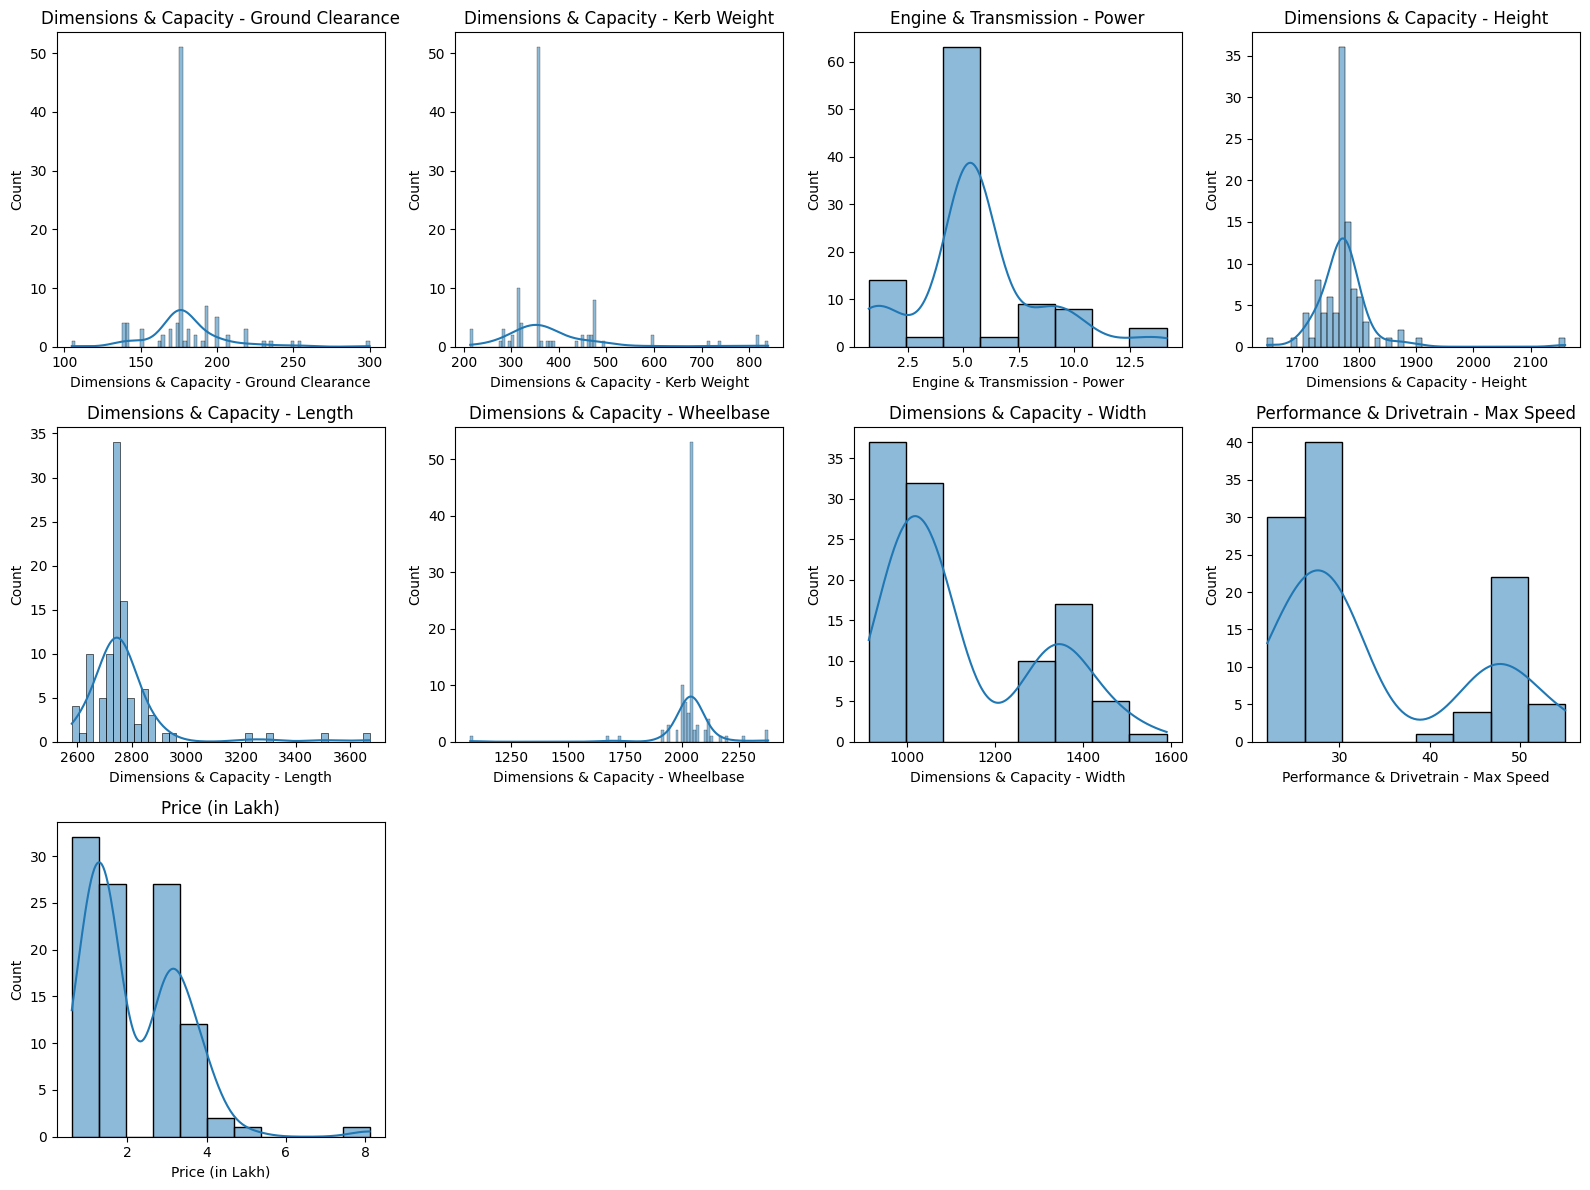

In [455]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot grid (e.g., 3 rows and 4 columns for a total of 12 plots)
num_cols = len(numerical_columns)
n_cols = 4  # Number of columns in the grid
n_rows = (num_cols + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Adjust the figsize for better clarity
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the numerical columns and plot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i], kde=True)  # You can use scatterplot, histplot, boxplot, etc.
    axes[i].set_title(col)

# Remove any extra subplots (if the number of plots is less than grid spaces)
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display
plt.tight_layout()
plt.show()


Scatter Plots

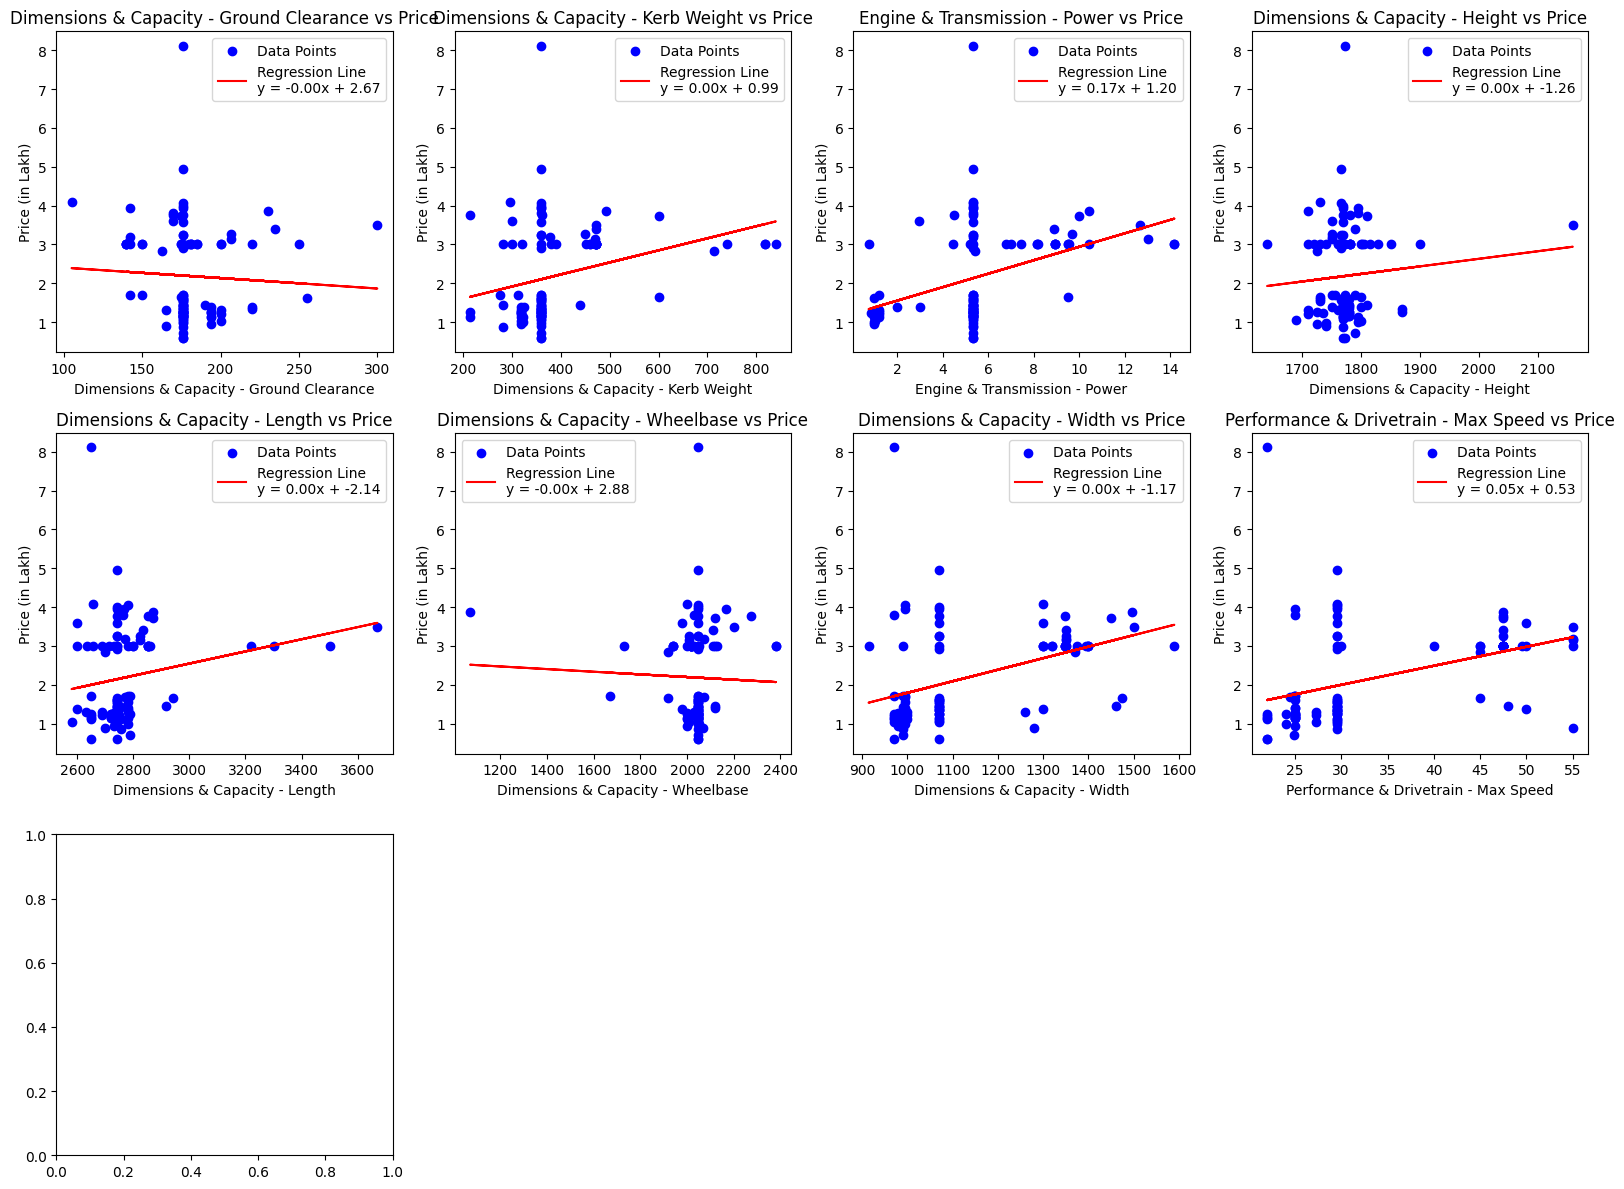

In [456]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot grid (3 rows and 4 columns as an example)
num_cols = len(numerical_columns)
n_cols = 4  # Number of columns in the grid
n_rows = (num_cols + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

# Loop through the numerical columns to create scatter plots with regression lines
for i, col in enumerate(numerical_columns):
    if col != 'Price (in Lakh)':  # Avoid plotting Price vs Price
        x = df[col]
        y = df['Price (in Lakh)']
        
        # Scatter plot
        axes[i].scatter(x, y, color='blue', label='Data Points')
        
        # Fit a regression line
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        reg_line = slope * x + intercept
        
        # Plot regression line
        axes[i].plot(x, reg_line, color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}')
        
        # Set labels and title
        axes[i].set_title(f'{col} vs Price')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price (in Lakh)')
        axes[i].legend()

# Remove any extra subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display
plt.tight_layout()
plt.show()


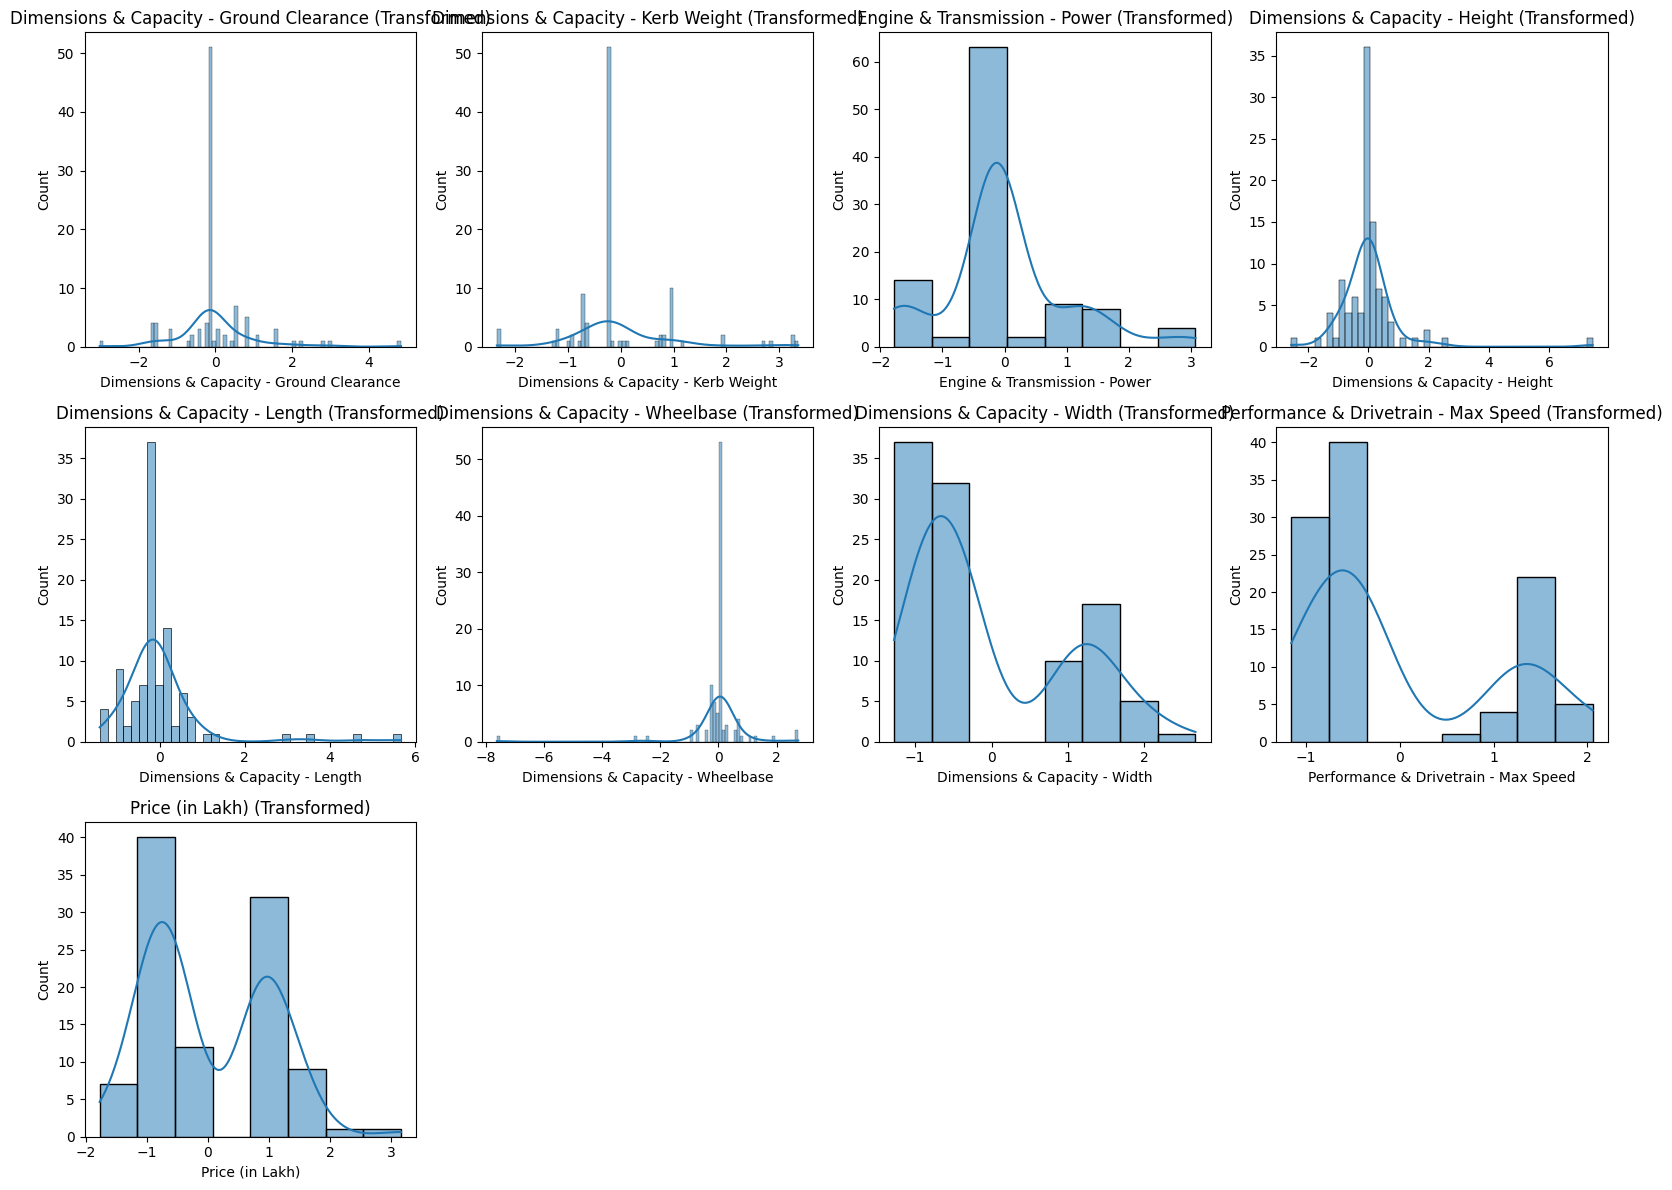

In [457]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the dataframe to preserve original data
df_transformed = df.copy()

# Log transform skewed columns
skewed_columns = ['Price (in Lakh)', 'Dimensions & Capacity - Kerb Weight', 'Dimensions & Capacity - Length']
for col in skewed_columns:
    df_transformed[col] = np.log1p(df_transformed[col])  # Use log1p to handle zeros safely

# Standardize (scale) the numerical columns
scaler = StandardScaler()
numerical_columns = df_transformed.select_dtypes(include=['float64', 'int64']).columns
df_transformed[numerical_columns] = scaler.fit_transform(df_transformed[numerical_columns])

# Set up the plot grid (e.g., 3 rows and 4 columns for a total of 12 plots)
num_cols = len(numerical_columns)
n_cols = 4  # Number of columns in the grid
n_rows = (num_cols + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Adjust the figsize for better clarity
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the numerical columns and plot
for i, col in enumerate(numerical_columns):
    sns.histplot(df_transformed[col], ax=axes[i], kde=True)  # You can use scatterplot, histplot, boxplot, etc.
    axes[i].set_title(f'{col} (Transformed)')

# Remove any extra subplots (if the number of plots is less than grid spaces)
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display
plt.tight_layout()
plt.show()


In [458]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1: Standardize the dataset (except the target variable 'Price')
# Assuming df is your DataFrame and 'Price (in Lakh)' is the target variable
df = final_df_cleaned  # Use your cleaned DataFrame
X = df.drop(columns=['Price (in Lakh)', 'Rickshaw Name'])  # Features (all columns except the target)
y = df['Price (in Lakh)']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Add a constant (intercept) to the model
X_scaled_with_intercept = sm.add_constant(X_scaled)

# Step 3: Fit the Multiple Linear Regression (MLR) model
mlr_model = sm.OLS(y, X_scaled_with_intercept).fit()

# Step 4: Print the regression summary
print(mlr_model.summary())

# Step 5: Making predictions using the standardized data
y_pred_standardized = mlr_model.predict(X_scaled_with_intercept)

# Step 6: Convert predictions back to original units
# Since the target 'Price (in Lakh)' was not scaled, we can directly use the predicted values
y_pred_original_units = y_pred_standardized

# Step 7: Compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual Price': y,
    'Predicted Price': y_pred_original_units
})

print(comparison_df.head())


                            OLS Regression Results                            
Dep. Variable:        Price (in Lakh)   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     2.767
Date:                Wed, 25 Sep 2024   Prob (F-statistic):            0.00654
Time:                        08:20:52   Log-Likelihood:                -152.74
No. Observations:                 102   AIC:                             325.5
Df Residuals:                      92   BIC:                             351.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1883      0.113     19.404      0.0

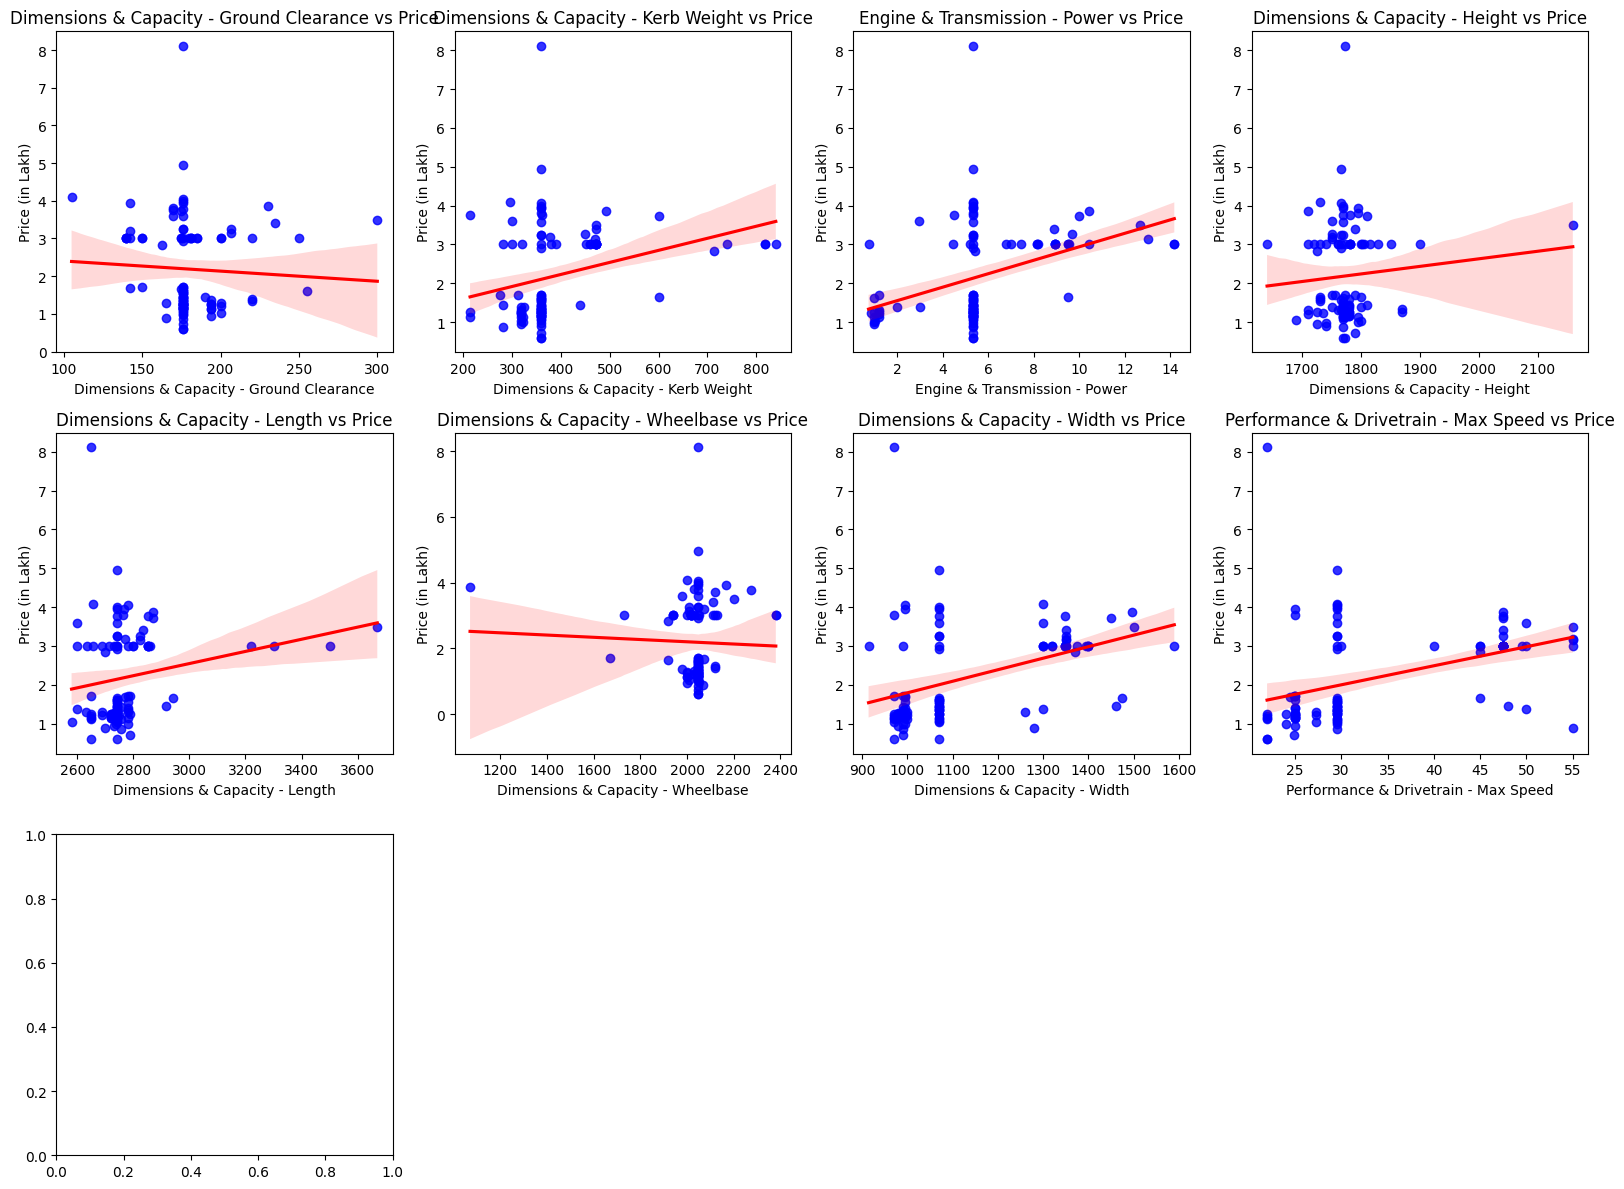

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' with the structure you shared
# df = pd.read_csv('your_dataframe.csv')

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot grid (3 rows and 4 columns as an example)
num_cols = len(numerical_columns)
n_cols = 4  # Number of columns in the grid
n_rows = (num_cols + n_cols - 1) // n_cols  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

# Loop through the numerical columns to create scatter plots with regression lines
for i, col in enumerate(numerical_columns):
    if col != 'Price (in Lakh)':  # Avoid plotting Price vs Price
        sns.regplot(x=df[col], y=df['Price (in Lakh)'], ax=axes[i], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
        axes[i].set_title(f'{col} vs Price')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price (in Lakh)')

# Remove any extra subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display
plt.tight_layout()
plt.show()


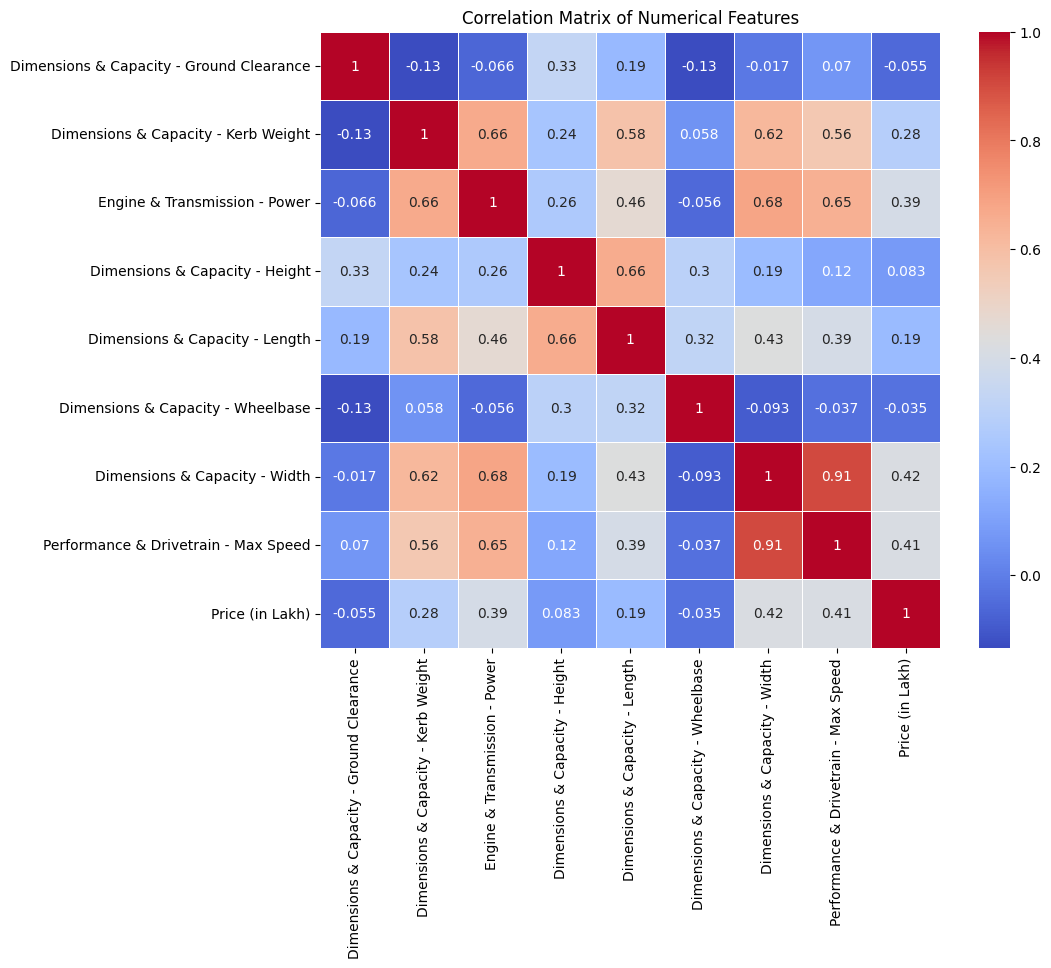

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numerical_df.corr()

# Heatmap for visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
